In [51]:
from search_clustering.client import ElasticClient
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tqdm import tqdm
from scipy.stats import skew

client = ElasticClient()

# Documents per Year

In [2]:
counts = []

years = range(1995, 2022)

for year in years:
    res = client.count(query=str(year), index="faz", field="publication_date")
    counts.append(res["count"])

/home/chris/Documents/studium/MSc/semester5/masterthesis/code/search_clustering/client.py:24: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  return self.client.count(index=index, query={"match_phrase": {field: query}})


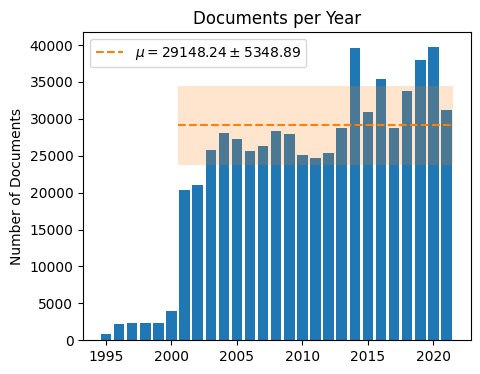

20354

In [3]:
mean = round(np.mean(counts[6:]), 2)
std = round(np.std(counts[6:]), 2)

fix, ax = plt.subplots(figsize=(5, 4))

rect = plt.Rectangle(
    (2000.5, mean - std), 2021 - 2000, 2 * std, facecolor="C1", alpha=0.2
)

ax.bar(years, counts, log=False)
ax.hlines(
    mean,
    2000.5,
    2021.5,
    linestyles="dashed",
    color="C1",
    label=rf"$\mu = {mean} \pm {std}$",
)
ax.add_patch(rect)

plt.ylabel("Number of Documents")
plt.title("Documents per Year")
plt.legend()
plt.show()
counts[6]

# Tokens per Document

In [9]:
years = range(1995, 2022)

tokens = []
min_tokens = 21  # 2001
max_tokens = 13598  # 2021

if False:
    for year in tqdm(years):
        res = client.search(
            query=str(year), index="faz", field="publication_date", size=10_000
        )
        counts = [len(word_tokenize(doc["_source"]["body"])) for doc in res]
        tokens.append(counts)
    with open("tokens.pickle", "wb") as f:
        pickle.dump(tokens, f)

else:
    with open("tokens.pickle", "rb") as f:
        tokens = pickle.load(f)

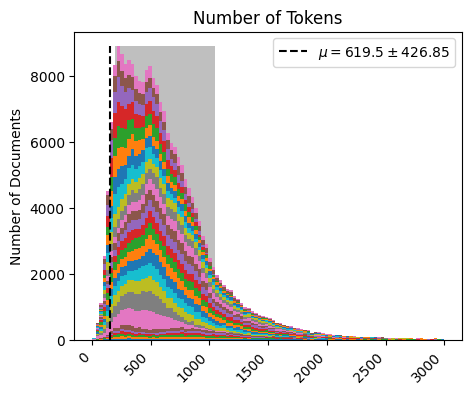

In [102]:
# flat_counts = [count for year in tokens for count in year]
mean = round(np.mean(flat_counts), 2)
std = round(np.std(flat_counts), 2)

fig, ax = plt.subplots(figsize=(5, 4))

rect = plt.Rectangle((mean - std, 0), 2 * std, 8900, facecolor="black", alpha=0.25)
ax.add_patch(rect)

ax.hist(tokens, bins=100, range=(0, 3000), histtype="barstacked")
ax.vlines(
    150, 0, 8900, linestyles="dashed", color="black", label=rf"$\mu = {mean} \pm {std}$"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Documents")
plt.title("Number of Tokens")
plt.legend()
plt.show()